In [50]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [51]:
# Reading the csv file and putting it into 'df' object.
df = pd.read_csv('C:/Users/SV Reddy/Downloads/Training_Set.csv')

In [52]:
df.head()

,Attribute 1 (a1),Attribute 2 (a2),Class Label
0,2,11,2
1,2,13,2
2,2,15,2
3,2,27,1
4,2,39,1


In [53]:
# Putting feature variable to X
X_train = df.drop('Class Label',axis=1)

# Putting response variable to y
y_train = df['Class Label']

In [54]:
df_val = pd.read_csv('C:/Users/SV Reddy/Downloads/Validation_Set.csv')
df_val.head()

,Attribute 1 (a1),Attribute 2 (a2),True Class Label,Class Label as predicted by the decision tree,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,2,35,1,1,NaN,NaN,NaN
1,12,13,2,1,NaN,NaN,NaN
2,-4,45,2,2,NaN,NaN,NaN
3,2,17,2,2,NaN,NaN,NaN


In [55]:
df_val.drop(['Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6'], axis=1, inplace=True)
X_test = df_val.drop(['True Class Label', 'Class Label as predicted by the decision tree'], axis=1)
y_test = df_val['True Class Label']

In [56]:
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=20, min_samples_split = 10, min_samples_leaf = 5, criterion = 'gini' )
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=20, min_samples_leaf=5, min_samples_split=10)

[Text(167.4, 190.26, 'X[1] <= 21.0\ngini = 0.5\nsamples = 30\nvalue = [15, 15]'),
 Text(83.7, 135.9, 'X[0] <= 5.0\ngini = 0.401\nsamples = 18\nvalue = [13, 5]'),
 Text(41.85, 81.53999999999999, 'gini = 0.5\nsamples = 6\nvalue = [3, 3]'),
 Text(125.55000000000001, 81.53999999999999, 'X[0] <= 9.0\ngini = 0.278\nsamples = 12\nvalue = [10, 2]'),
 Text(83.7, 27.180000000000007, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(167.4, 27.180000000000007, 'gini = 0.444\nsamples = 6\nvalue = [4, 2]'),
 Text(251.10000000000002, 135.9, 'X[0] <= 7.0\ngini = 0.278\nsamples = 12\nvalue = [2, 10]'),
 Text(209.25, 81.53999999999999, 'gini = 0.444\nsamples = 6\nvalue = [2, 4]'),
 Text(292.95, 81.53999999999999, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]')]

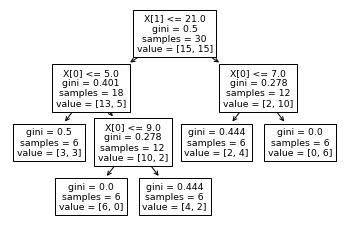

In [57]:
from sklearn import tree
tree.plot_tree(dt_default)

In [58]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_default = dt_default.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.50      0.33      0.40         3

    accuracy                           0.25         4
   macro avg       0.25      0.17      0.20         4
weighted avg       0.38      0.25      0.30         4



In [59]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))

[[0 1]
 [2 1]]
0.25
